In [346]:
import pandas as pd
# 필요한 라이브러리 불러오기

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import matplotlib.font_manager as fm

# 한글 깨짐 방지 
plt.rcParams['font.family'] = 'NanumGothic' 

In [347]:
df = pd.read_csv('C:/k-project\source\model(최종)-업로드X/00_국가별_데이터_전처리_세계_추가_수정.csv')  # 경로 수정 필요. 추후 통합하는 걸로

In [348]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9744 entries, 0 to 9743
Data columns (total 29 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   COUNTRY                                     9744 non-null   object 
 1   Year                                        9744 non-null   int64  
 2   Biomass and waste (billion kWh)             9744 non-null   float64
 3   CO2 emissions (MMtonnes CO2)                9744 non-null   float64
 4   Coal (quad Btu)                             9744 non-null   float64
 5   Coal and coke (MMtonnes CO2)                9744 non-null   float64
 6   Consumed natural gas (MMtonnes CO2)         9744 non-null   float64
 7   Consumption (quad Btu)                      9744 non-null   float64
 8   Fossil fuels (billion kWh)                  9744 non-null   float64
 9   GDP                                         9744 non-null   float64
 10  Generation (

In [349]:
df['COUNTRY'].unique()

array(['Afghanistan', 'Albania', 'Algeria', 'American Samoa', 'Angola',
       'Antarctica', 'Antigua and Barbuda', 'Argentina', 'Armenia',
       'Aruba', 'Australia', 'Austria', 'Azerbaijan', 'Bahrain',
       'Bangladesh', 'Barbados', 'Belarus', 'Belgium', 'Belize', 'Benin',
       'Bermuda', 'Bhutan', 'Bolivia', 'Bosnia and Herzegovina',
       'Botswana', 'Brazil', 'British Virgin Islands', 'Brunei',
       'Bulgaria', 'Burkina Faso', 'Burma', 'Burundi', 'Cabo Verde',
       'Cambodia', 'Cameroon', 'Canada', 'Cayman Islands',
       'Central African Republic', 'Chad', 'Chile', 'China', 'Colombia',
       'Comoros', 'Congo-Brazzaville', 'Congo-Kinshasa', 'Cook Islands',
       'Costa Rica', "Cote d'Ivoire", 'Cote dIvoire', 'Croatia', 'Cuba',
       'Cyprus', 'Czechia', 'Denmark', 'Djibouti', 'Dominica',
       'Dominican Republic', 'Ecuador', 'Egypt', 'El Salvador',
       'Equatorial Guinea', 'Eritrea', 'Estonia', 'Eswatini', 'Ethiopia',
       'Falkland Islands', 'Faroe Islands',

In [350]:
df.columns

Index(['COUNTRY', 'Year', 'Biomass and waste (billion kWh)',
       'CO2 emissions (MMtonnes CO2)', 'Coal (quad Btu)',
       'Coal and coke (MMtonnes CO2)', 'Consumed natural gas (MMtonnes CO2)',
       'Consumption (quad Btu)', 'Fossil fuels (billion kWh)', 'GDP',
       'Generation (billion kWh)', 'Geothermal (billion kWh)',
       'Hydroelectric pumped storage (billion kWh)',
       'Hydroelectricity (billion kWh)', 'Natural gas (quad Btu)',
       'Non-hydroelectric renewables (billion kWh)', 'Nuclear (billion kWh)',
       'Nuclear (quad Btu)', 'Nuclear, renewables, and other (quad Btu)',
       'Petroleum and other liquids (MMtonnes CO2)',
       'Petroleum and other liquids (quad Btu)', 'Population',
       'Renewables (billion kWh)', 'Renewables and other (quad Btu)',
       'Solar (billion kWh)', 'Solar, tide, wave, fuel cell (billion kWh)',
       'Tide and wave (billion kWh)', 'Wind (billion kWh)',
       'electricity net consumption (billion kWh)'],
      dtype='object')

In [351]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9744 entries, 0 to 9743
Data columns (total 29 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   COUNTRY                                     9744 non-null   object 
 1   Year                                        9744 non-null   int64  
 2   Biomass and waste (billion kWh)             9744 non-null   float64
 3   CO2 emissions (MMtonnes CO2)                9744 non-null   float64
 4   Coal (quad Btu)                             9744 non-null   float64
 5   Coal and coke (MMtonnes CO2)                9744 non-null   float64
 6   Consumed natural gas (MMtonnes CO2)         9744 non-null   float64
 7   Consumption (quad Btu)                      9744 non-null   float64
 8   Fossil fuels (billion kWh)                  9744 non-null   float64
 9   GDP                                         9744 non-null   float64
 10  Generation (

In [352]:
df['COUNTRY'].unique()

array(['Afghanistan', 'Albania', 'Algeria', 'American Samoa', 'Angola',
       'Antarctica', 'Antigua and Barbuda', 'Argentina', 'Armenia',
       'Aruba', 'Australia', 'Austria', 'Azerbaijan', 'Bahrain',
       'Bangladesh', 'Barbados', 'Belarus', 'Belgium', 'Belize', 'Benin',
       'Bermuda', 'Bhutan', 'Bolivia', 'Bosnia and Herzegovina',
       'Botswana', 'Brazil', 'British Virgin Islands', 'Brunei',
       'Bulgaria', 'Burkina Faso', 'Burma', 'Burundi', 'Cabo Verde',
       'Cambodia', 'Cameroon', 'Canada', 'Cayman Islands',
       'Central African Republic', 'Chad', 'Chile', 'China', 'Colombia',
       'Comoros', 'Congo-Brazzaville', 'Congo-Kinshasa', 'Cook Islands',
       'Costa Rica', "Cote d'Ivoire", 'Cote dIvoire', 'Croatia', 'Cuba',
       'Cyprus', 'Czechia', 'Denmark', 'Djibouti', 'Dominica',
       'Dominican Republic', 'Ecuador', 'Egypt', 'El Salvador',
       'Equatorial Guinea', 'Eritrea', 'Estonia', 'Eswatini', 'Ethiopia',
       'Falkland Islands', 'Faroe Islands',

12 개 국가 데이터만 추출하기 (경제 및 애너지를 중점으로) 선별하는거 부터 다시 이야기를 해봐야 하나?  
아님 발전 상위 국가 10개 내지 20개만 추출?

In [353]:
countries_to_select = ['France', 'United States', 'China',
                       'South Korea','Japan', 'United Kingdom',
                       'Russia', 'India', 'Australia',
                       'Germany', 'Germany, East', 'Germany, West',
                       'Canada', 'Ireland','Former U.S.S.R.']

import_country = df[df['COUNTRY'].isin(countries_to_select)]

import_country.head()


,COUNTRY,Year,Biomass and waste (billion kWh),CO2 emissions (MMtonnes CO2),Coal (quad Btu),Coal and coke (MMtonnes CO2),Consumed natural gas (MMtonnes CO2),Consumption (quad Btu),Fossil fuels (billion kWh),GDP,...,Petroleum and other liquids (MMtonnes CO2),Petroleum and other liquids (quad Btu),Population,Renewables (billion kWh),Renewables and other (quad Btu),Solar (billion kWh),"Solar, tide, wave, fuel cell (billion kWh)",Tide and wave (billion kWh),Wind (billion kWh),electricity net consumption (billion kWh)
420,Australia,1980,0.4,221.314466,1.287102,126.716798,17.989712,2.985436,74.538,373.1925,...,76.607956,1.225279,14723.54,13.214,0.133989,0.0,0.0,0.0,0.0,78.227
421,Australia,1981,0.4,223.053852,1.317761,129.723177,20.559671,3.049886,78.934,388.6091,...,72.771005,1.195341,14957.06,14.335,0.149280,0.0,0.0,0.0,0.0,81.717
422,Australia,1982,0.5,230.129715,1.394639,133.863175,22.738549,3.231536,83.193,389.3487,...,73.527991,1.262620,15210.17,13.961,0.145707,0.0,0.0,0.0,0.0,88.356
423,Australia,1983,0.4,219.685227,1.325105,125.379483,23.073761,3.106749,85.971,386.8448,...,71.231984,1.216325,15416.26,12.411,0.130430,0.0,0.0,0.0,0.0,89.591
424,Australia,1984,0.4,227.994782,1.267020,120.132560,24.605560,3.149405,91.686,412.8027,...,83.256663,1.289833,15605.43,12.375,0.128792,0.0,0.0,0.0,0.0,95.546


In [354]:
import_country

,COUNTRY,Year,Biomass and waste (billion kWh),CO2 emissions (MMtonnes CO2),Coal (quad Btu),Coal and coke (MMtonnes CO2),Consumed natural gas (MMtonnes CO2),Consumption (quad Btu),Fossil fuels (billion kWh),GDP,...,Petroleum and other liquids (MMtonnes CO2),Petroleum and other liquids (quad Btu),Population,Renewables (billion kWh),Renewables and other (quad Btu),Solar (billion kWh),"Solar, tide, wave, fuel cell (billion kWh)",Tide and wave (billion kWh),Wind (billion kWh),electricity net consumption (billion kWh)
420,Australia,1980,0.400000,221.314466,1.287102,126.716798,17.989712,2.985436,74.538000,373.1925,...,76.607956,1.225279,14723.54,13.214000,0.133989,0.000000,0.000000,0.0,0.000000,78.227000
421,Australia,1981,0.400000,223.053852,1.317761,129.723177,20.559671,3.049886,78.934000,388.6091,...,72.771005,1.195341,14957.06,14.335000,0.149280,0.000000,0.000000,0.0,0.000000,81.717000
422,Australia,1982,0.500000,230.129715,1.394639,133.863175,22.738549,3.231536,83.193000,389.3487,...,73.527991,1.262620,15210.17,13.961000,0.145707,0.000000,0.000000,0.0,0.000000,88.356000
423,Australia,1983,0.400000,219.685227,1.325105,125.379483,23.073761,3.106749,85.971000,386.8448,...,71.231984,1.216325,15416.26,12.411000,0.130430,0.000000,0.000000,0.0,0.000000,89.591000
424,Australia,1984,0.400000,227.994782,1.267020,120.132560,24.605560,3.149405,91.686000,412.8027,...,83.256663,1.289833,15605.43,12.375000,0.128792,0.000000,0.000000,0.0,0.000000,95.546000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9277,United States,2017,75.741828,5131.373947,13.837465,1317.951988,1470.964449,97.659855,2537.396716,18924.5700,...,2342.457510,37.522871,326385.10,723.581375,11.141627,77.277148,77.277148,0.0,254.302695,3888.305645
9278,United States,2018,74.805127,5277.725936,13.251532,1262.555409,1626.907570,101.244289,2660.018747,19481.9400,...,2388.262957,38.354617,328319.80,749.328293,11.374004,93.364589,93.364589,0.0,272.667454,4032.628267
9279,United States,2019,70.838120,5146.842460,11.315595,1077.519881,1684.623741,100.482331,2584.421488,19928.9700,...,2384.698838,38.329386,330046.30,776.961321,11.472714,106.894269,106.894269,0.0,295.882483,3989.378249
9280,United States,2020,67.566802,4580.372166,9.181109,876.195454,1649.822720,93.012185,2429.342031,19377.3600,...,2054.353992,33.644493,331429.10,837.389537,11.523394,130.721095,130.721095,0.0,337.938049,3897.894198


In [355]:
import_country.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 630 entries, 420 to 9281
Data columns (total 29 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   COUNTRY                                     630 non-null    object 
 1   Year                                        630 non-null    int64  
 2   Biomass and waste (billion kWh)             630 non-null    float64
 3   CO2 emissions (MMtonnes CO2)                630 non-null    float64
 4   Coal (quad Btu)                             630 non-null    float64
 5   Coal and coke (MMtonnes CO2)                630 non-null    float64
 6   Consumed natural gas (MMtonnes CO2)         630 non-null    float64
 7   Consumption (quad Btu)                      630 non-null    float64
 8   Fossil fuels (billion kWh)                  630 non-null    float64
 9   GDP                                         630 non-null    float64
 10  Generation 

In [356]:
# 상위 - 하위 카테고리로 묶여 있는 값 제거. 상위 범주 안에 이미 해당 값들이 포함되어 있음 
X = import_country[['Renewables (billion kWh)', 'Fossil fuels (billion kWh)', 'Nuclear (billion kWh)']]

X

,Renewables (billion kWh),Fossil fuels (billion kWh),Nuclear (billion kWh)
420,13.214000,74.538000,0.000000
421,14.335000,78.934000,0.000000
422,13.961000,83.193000,0.000000
423,12.411000,85.971000,0.000000
424,12.375000,91.686000,0.000000
...,...,...,...
9277,723.581375,2537.396716,804.949635
9278,749.328293,2660.018747,807.084477
9279,776.961321,2584.421488,809.409262
9280,837.389537,2429.342031,789.878863


In [357]:
y = import_country['electricity net consumption (billion kWh)']

y

420       78.227000
421       81.717000
422       88.356000
423       89.591000
424       95.546000
           ...     
9277    3888.305645
9278    4032.628267
9279    3989.378249
9280    3897.894198
9281    3979.279761
Name: electricity net consumption (billion kWh), Length: 630, dtype: float64

In [358]:
# 코드 10-2
# 스탯츠모델스, 사이킷런 ==========
from statsmodels.formula.api import ols 
from sklearn.linear_model import LinearRegression

# 선형 회귀모형 형태(종속변수 ~ 독립변수1 + 독립변수2 + 독립변수3 + ···)
# 단순 선형 회귀분석 ==========

# OLS 모델 적합
model = ols(formula='y ~ X', data={'y': y, 'X': X}).fit()

# 모델 요약 정보 출력
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.996
Model:                            OLS   Adj. R-squared:                  0.996
Method:                 Least Squares   F-statistic:                 5.128e+04
Date:                Wed, 08 Nov 2023   Prob (F-statistic):               0.00
Time:                        16:08:37   Log-Likelihood:                -3573.4
No. Observations:                 630   AIC:                             7155.
Df Residuals:                     626   BIC:                             7173.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -27.5117      3.462     -7.946      0.0

In [359]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 1004, shuffle = False)


In [360]:
from sklearn.svm import LinearSVR

from math import sqrt
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, accuracy_score
from  sklearn.metrics import r2_score

model = LinearSVR(epsilon=0.005, random_state=1) # random_state=1
model.fit(X_train, y_train)



C:\Users\vlrms\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.7_qbz5n2kfra8p0\LocalCache\local-packages\Python37\site-packages\sklearn\svm\_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


LinearSVR(epsilon=0.005, random_state=1)

In [361]:
# Predict를 수행하고 mean_absolute_error, rmse 결과 출력하기
pred = model.predict(X_test)    # X_test를 이용한 예측값 pred 
mean_absolute_error(y_test, pred)
np.sqrt(mean_squared_error(y_test, pred))

mae = mean_absolute_error(y_test, pred)
rmse = np.sqrt(mean_squared_error(y_test, pred))

# MAE 및 RMSE를 백분율로 표시
mae_percentage = (mae / np.mean(y_test)) * 100
rmse_percentage = (rmse / np.mean(y_test)) * 100

print("MAE: {:.2f}%".format(mae_percentage))
print("RMSE: {:.2f}%".format(rmse_percentage))
print('R^2: ', r2_score(y_test, pred))



Train RMSE: 89.10704389470996
MAE: 1.96%
RMSE: 2.95%
R^2:  0.9993245207845437


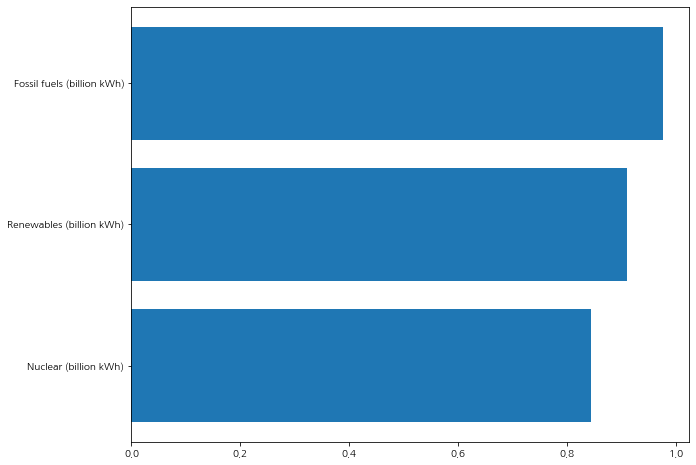

In [362]:
# Feature importance, feature 선언
importances = model.coef_
features = X.columns

# 중요한 변수 순으로 정렬
indices = np.argsort(importances)
sorted_features = [features[i] for i in indices]

# 그래프 크기 지정
plt.figure(figsize=(10, 8))

# 막대그래프 show
plt.barh(sorted_features, importances[indices])
plt.show()

In [363]:
# 한국의 경우를 살펴보자

In [364]:

korea = df[df['COUNTRY'].values == 'South Korea']

korea.head()


,COUNTRY,Year,Biomass and waste (billion kWh),CO2 emissions (MMtonnes CO2),Coal (quad Btu),Coal and coke (MMtonnes CO2),Consumed natural gas (MMtonnes CO2),Consumption (quad Btu),Fossil fuels (billion kWh),GDP,...,Petroleum and other liquids (MMtonnes CO2),Petroleum and other liquids (quad Btu),Population,Renewables (billion kWh),Renewables and other (quad Btu),Solar (billion kWh),"Solar, tide, wave, fuel cell (billion kWh)",Tide and wave (billion kWh),Wind (billion kWh),electricity net consumption (billion kWh)
7980,South Korea,1980,0.0,138.900835,0.641699,65.508952,0.0,1.880552,29.756,203.9763,...,73.391883,1.186886,38240.45,1.539,0.019466,0.0,0.0,0.0,0.0,32.064
7981,South Korea,1981,0.0,146.252559,0.738988,74.784060,0.0,1.969778,32.400,218.7568,...,71.468498,1.177959,38809.23,2.257,0.025749,0.0,0.0,0.0,0.0,34.657
7982,South Korea,1982,0.0,149.455274,0.779075,78.742436,0.0,2.006706,34.965,236.9969,...,70.712838,1.172571,39424.22,1.560,0.019758,0.0,0.0,0.0,0.0,36.970
7983,South Korea,1983,0.0,153.810665,0.804239,81.149796,0.0,2.152857,34.799,268.6982,...,72.660870,1.230819,40061.09,2.272,0.028502,0.0,0.0,0.0,0.0,41.587
7984,South Korea,1984,0.0,169.265319,0.913141,91.702179,0.0,2.250154,37.097,297.0501,...,77.563140,1.194586,40694.95,1.978,0.024963,0.0,0.0,0.0,0.0,46.327


In [365]:
korea.columns

Index(['COUNTRY', 'Year', 'Biomass and waste (billion kWh)',
       'CO2 emissions (MMtonnes CO2)', 'Coal (quad Btu)',
       'Coal and coke (MMtonnes CO2)', 'Consumed natural gas (MMtonnes CO2)',
       'Consumption (quad Btu)', 'Fossil fuels (billion kWh)', 'GDP',
       'Generation (billion kWh)', 'Geothermal (billion kWh)',
       'Hydroelectric pumped storage (billion kWh)',
       'Hydroelectricity (billion kWh)', 'Natural gas (quad Btu)',
       'Non-hydroelectric renewables (billion kWh)', 'Nuclear (billion kWh)',
       'Nuclear (quad Btu)', 'Nuclear, renewables, and other (quad Btu)',
       'Petroleum and other liquids (MMtonnes CO2)',
       'Petroleum and other liquids (quad Btu)', 'Population',
       'Renewables (billion kWh)', 'Renewables and other (quad Btu)',
       'Solar (billion kWh)', 'Solar, tide, wave, fuel cell (billion kWh)',
       'Tide and wave (billion kWh)', 'Wind (billion kWh)',
       'electricity net consumption (billion kWh)'],
      dtype='object')

In [366]:
korea = korea[['Renewables (billion kWh)', 'Fossil fuels (billion kWh)', 'Nuclear (billion kWh)',
               'electricity net consumption (billion kWh)']]

korea.head()

,Renewables (billion kWh),Fossil fuels (billion kWh),Nuclear (billion kWh),electricity net consumption (billion kWh)
7980,1.539,29.756,3.277,32.064
7981,2.257,32.400,2.730,34.657
7982,1.560,34.965,3.559,36.970
7983,2.272,34.799,8.449,41.587
7984,1.978,37.097,11.113,46.327


In [367]:
X = korea[['Renewables (billion kWh)', 'Fossil fuels (billion kWh)', 'Nuclear (billion kWh)']]

X

,Renewables (billion kWh),Fossil fuels (billion kWh),Nuclear (billion kWh)
7980,1.539000,29.756000,3.277000
7981,2.257000,32.400000,2.730000
7982,1.560000,34.965000,3.559000
7983,2.272000,34.799000,8.449000
7984,1.978000,37.097000,11.113000
7985,3.153000,35.211000,15.780000
7986,3.078000,30.306000,26.680000
7987,3.925000,27.467000,37.050000
7988,1.967000,39.288000,37.791000
7989,2.934000,39.996000,44.995000


In [368]:
y = korea['electricity net consumption (billion kWh)']

y

7980     32.064000
7981     34.657000
7982     36.970000
7983     41.587000
7984     46.327000
7985     50.146000
7986     55.935000
7987     63.546000
7988     73.367000
7989     81.014000
7990     94.492000
7991    107.473000
7992    118.985000
7993    126.065420
7994    163.295740
7995    180.037930
7996    199.950620
7997    218.276237
7998    212.458000
7999    212.019000
8000    259.542330
8001    279.254560
8002    296.400100
8003    312.891780
8004    332.926480
8005    350.193780
8006    364.485280
8007    387.021240
8008    402.892360
8009    409.231820
8010    458.783746
8011    481.907834
8012    492.878837
8013    497.599475
8014    504.727892
8015    505.535225
8016    516.627693
8017    520.977470
8018    542.900448
8019    534.272560
8020    531.735114
8021    567.672433
Name: electricity net consumption (billion kWh), dtype: float64

In [369]:
# 종속변수 및 독립변수 설정
# X = korea[['Renewables (billion kWh)', 'Fossil fuels (billion kWh)', 'Nuclear (billion kWh)']]
# y = korea['electricity net consumption (billion kWh)']

# OLS 모델 적합
model = ols(formula='y ~ X', data={'y': y, 'X': X}).fit()

# 모델 요약 정보 출력
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 2.868e+05
Date:                Wed, 08 Nov 2023   Prob (F-statistic):           9.07e-83
Time:                        16:08:37   Log-Likelihood:                -67.745
No. Observations:                  42   AIC:                             143.5
Df Residuals:                      38   BIC:                             150.4
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -2.3787      0.417     -5.709      0.0

In [370]:
# # 코드 10-2
# # 스탯츠모델스, 사이킷런 ==========
# from statsmodels.formula.api import ols 
# from sklearn.linear_model import LinearRegression

# # 선형 회귀모형 형태(종속변수 ~ 독립변수1 + 독립변수2 + 독립변수3 + ···)
# # 단순 선형 회귀분석 ==========

# fit = ols('y~X', data=korea).fit()
# print(fit.summary())

In [371]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 1004, shuffle = False)


In [372]:
from sklearn.svm import LinearSVR

from math import sqrt
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, accuracy_score
from  sklearn.metrics import r2_score

model = LinearSVR(epsilon=0.005, random_state=1) # random_state=1
model.fit(X_train, y_train)



C:\Users\vlrms\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.7_qbz5n2kfra8p0\LocalCache\local-packages\Python37\site-packages\sklearn\svm\_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


LinearSVR(epsilon=0.005, random_state=1)

In [373]:
# Predict를 수행하고 mean_absolute_error, rmse 결과 출력하기
pred = model.predict(X_test)    # X_test를 이용한 예측값 pred 
mean_absolute_error(y_test, pred)
np.sqrt(mean_squared_error(y_test, pred))

mae = mean_absolute_error(y_test, pred)
rmse = np.sqrt(mean_squared_error(y_test, pred))

# MAE 및 RMSE를 백분율로 표시
mae_percentage = (mae / np.mean(y_test)) * 100
rmse_percentage = (rmse / np.mean(y_test)) * 100

print("MAE: {:.2f}%".format(mae_percentage))
print("RMSE: {:.2f}%".format(rmse_percentage))
print('R^2: ', r2_score(y_test, pred))



MAE: 2.65%
RMSE: 3.08%
R^2:  0.8373943069116507


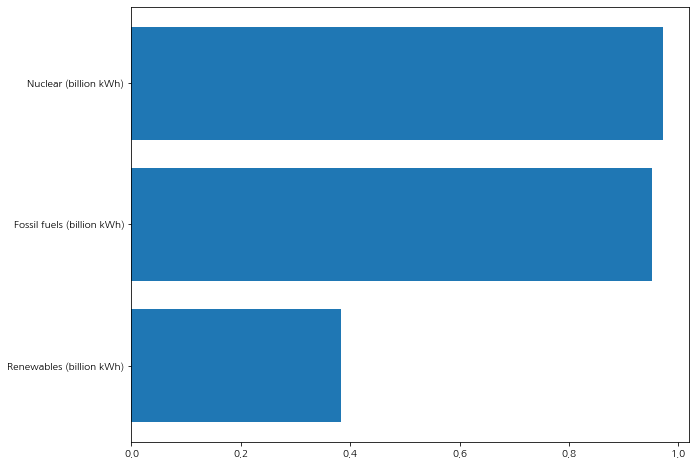

In [374]:
# Feature importance, feature 선언
importances = model.coef_
features = X.columns

# 중요한 변수 순으로 정렬
indices = np.argsort(importances)
sorted_features = [features[i] for i in indices]

# 그래프 크기 지정
plt.figure(figsize=(10, 8))

# 막대그래프 show
plt.barh(sorted_features, importances[indices])
plt.show()

In [375]:
australia = df[df['COUNTRY'].values == 'Australia']

australia.head()


,COUNTRY,Year,Biomass and waste (billion kWh),CO2 emissions (MMtonnes CO2),Coal (quad Btu),Coal and coke (MMtonnes CO2),Consumed natural gas (MMtonnes CO2),Consumption (quad Btu),Fossil fuels (billion kWh),GDP,...,Petroleum and other liquids (MMtonnes CO2),Petroleum and other liquids (quad Btu),Population,Renewables (billion kWh),Renewables and other (quad Btu),Solar (billion kWh),"Solar, tide, wave, fuel cell (billion kWh)",Tide and wave (billion kWh),Wind (billion kWh),electricity net consumption (billion kWh)
420,Australia,1980,0.4,221.314466,1.287102,126.716798,17.989712,2.985436,74.538,373.1925,...,76.607956,1.225279,14723.54,13.214,0.133989,0.0,0.0,0.0,0.0,78.227
421,Australia,1981,0.4,223.053852,1.317761,129.723177,20.559671,3.049886,78.934,388.6091,...,72.771005,1.195341,14957.06,14.335,0.149280,0.0,0.0,0.0,0.0,81.717
422,Australia,1982,0.5,230.129715,1.394639,133.863175,22.738549,3.231536,83.193,389.3487,...,73.527991,1.262620,15210.17,13.961,0.145707,0.0,0.0,0.0,0.0,88.356
423,Australia,1983,0.4,219.685227,1.325105,125.379483,23.073761,3.106749,85.971,386.8448,...,71.231984,1.216325,15416.26,12.411,0.130430,0.0,0.0,0.0,0.0,89.591
424,Australia,1984,0.4,227.994782,1.267020,120.132560,24.605560,3.149405,91.686,412.8027,...,83.256663,1.289833,15605.43,12.375,0.128792,0.0,0.0,0.0,0.0,95.546


In [376]:
australia = australia[['Renewables (billion kWh)', 'Fossil fuels (billion kWh)', 'Nuclear (billion kWh)',
               'electricity net consumption (billion kWh)']]

australia.head()

,Renewables (billion kWh),Fossil fuels (billion kWh),Nuclear (billion kWh),electricity net consumption (billion kWh)
420,13.214,74.538,0.0,78.227
421,14.335,78.934,0.0,81.717
422,13.961,83.193,0.0,88.356
423,12.411,85.971,0.0,89.591
424,12.375,91.686,0.0,95.546


In [377]:
# 상위 - 하위 카테고리로 묶여 있는 값 제거. 상위 범주 안에 이미 해당 값들이 포함되어 있음 
X = australia[['Renewables (billion kWh)', 'Fossil fuels (billion kWh)']]

X

,Renewables (billion kWh),Fossil fuels (billion kWh)
420,13.214000,74.538000
421,14.335000,78.934000
422,13.961000,83.193000
423,12.411000,85.971000
424,12.375000,91.686000
425,13.929000,97.054000
426,14.772000,101.933000
427,13.863000,108.543000
428,14.110000,117.095000
429,15.111000,124.164000


In [378]:
y = australia['electricity net consumption (billion kWh)']

y

420     78.227000
421     81.717000
422     88.356000
423     89.591000
424     95.546000
425     99.889000
426    106.969000
427    111.642000
428    120.921000
429    128.119000
430    135.404000
431    137.996000
432    140.133400
433    143.988000
434    147.502000
435    152.334000
436    156.545660
437    161.721000
438    172.088000
439    176.177000
440    182.969560
441    193.370820
442    199.560760
443    202.290560
444    211.343460
445    200.137300
446    204.131836
447    214.773976
448    214.640056
449    222.689996
450    219.107043
451    225.966257
452    220.378073
453    217.885825
454    232.303085
455    219.056959
456    231.726090
457    238.498993
458    238.883594
459    238.634439
460    239.484491
461    237.485875
Name: electricity net consumption (billion kWh), dtype: float64

In [379]:
# 종속변수 및 독립변수 설정
# X = korea[['Renewables (billion kWh)', 'Fossil fuels (billion kWh)', 'Nuclear (billion kWh)']]
# y = korea['electricity net consumption (billion kWh)']

# OLS 모델 적합
model = ols(formula='y ~ X', data={'y': y, 'X': X}).fit()

# 모델 요약 정보 출력
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.999
Model:                            OLS   Adj. R-squared:                  0.999
Method:                 Least Squares   F-statistic:                 2.297e+04
Date:                Wed, 08 Nov 2023   Prob (F-statistic):           1.28e-60
Time:                        16:08:37   Log-Likelihood:                -76.847
No. Observations:                  42   AIC:                             159.7
Df Residuals:                      39   BIC:                             164.9
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -7.1119      0.910     -7.815      0.0

In [380]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 1004, shuffle = False)


In [381]:
from sklearn.svm import LinearSVR

from math import sqrt
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, accuracy_score
from  sklearn.metrics import r2_score

model = LinearSVR(epsilon=0.005, random_state=1) # random_state=1
model.fit(X_train, y_train)



C:\Users\vlrms\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.7_qbz5n2kfra8p0\LocalCache\local-packages\Python37\site-packages\sklearn\svm\_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


LinearSVR(epsilon=0.005, random_state=1)

In [382]:
# Predict를 수행하고 mean_absolute_error, rmse 결과 출력하기
pred = model.predict(X_test)    # X_test를 이용한 예측값 pred 
mean_absolute_error(y_test, pred)
np.sqrt(mean_squared_error(y_test, pred))

mae = mean_absolute_error(y_test, pred)
rmse = np.sqrt(mean_squared_error(y_test, pred))

# MAE 및 RMSE를 백분율로 표시
mae_percentage = (mae / np.mean(y_test)) * 100
rmse_percentage = (rmse / np.mean(y_test)) * 100

print("MAE: {:.2f}%".format(mae_percentage))
print("RMSE: {:.2f}%".format(rmse_percentage))
print('R^2: ', r2_score(y_test, pred))



MAE: 5.59%
RMSE: 7.20%
R^2:  -2.840615863647274


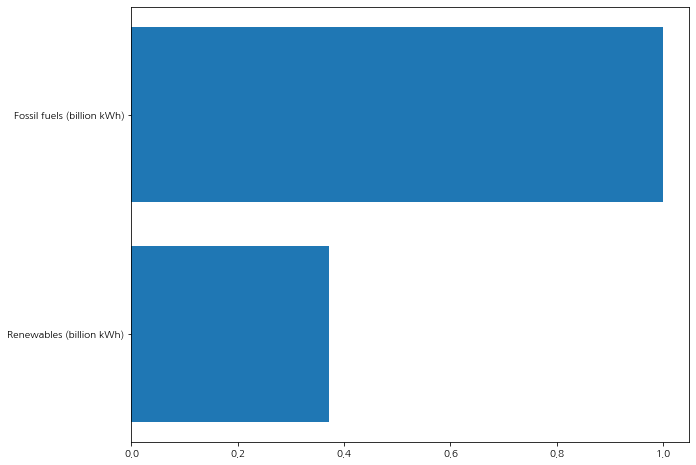

In [383]:
# Feature importance, feature 선언
importances = model.coef_
features = X.columns

# 중요한 변수 순으로 정렬
indices = np.argsort(importances)
sorted_features = [features[i] for i in indices]

# 그래프 크기 지정
plt.figure(figsize=(10, 8))

# 막대그래프 show
plt.barh(sorted_features, importances[indices])
plt.show()

In [384]:
usa = df[df['COUNTRY'].values == 'United States']

usa.head()


,COUNTRY,Year,Biomass and waste (billion kWh),CO2 emissions (MMtonnes CO2),Coal (quad Btu),Coal and coke (MMtonnes CO2),Consumed natural gas (MMtonnes CO2),Consumption (quad Btu),Fossil fuels (billion kWh),GDP,...,Petroleum and other liquids (MMtonnes CO2),Petroleum and other liquids (quad Btu),Population,Renewables (billion kWh),Renewables and other (quad Btu),Solar (billion kWh),"Solar, tide, wave, fuel cell (billion kWh)",Tide and wave (billion kWh),Wind (billion kWh),electricity net consumption (billion kWh)
9240,United States,1980,0.433163,4756.291608,15.422809,1453.794003,1058.053976,78.021113,1753.796457,7080.755,...,2244.443629,34.158965,227119.2,284.688332,5.428342,0.000000,0.000000,0.0,0.000000,2094.449000
9241,United States,1981,0.367829,4636.632309,15.907526,1502.932302,1032.089207,76.057187,1755.401180,7260.456,...,2101.610800,31.890666,229416.3,269.898656,5.413688,0.000000,0.000000,0.0,0.000000,2147.102862
9242,United States,1982,0.320918,4404.435525,15.321581,1449.084615,960.901404,73.046189,1644.061443,7129.566,...,1994.449506,30.198364,231608.6,317.537796,5.979637,0.000000,0.000000,0.0,0.000000,2086.441352
9243,United States,1983,0.378612,4383.942651,15.894442,1504.795517,901.093998,72.915394,1678.021330,7456.385,...,1978.053136,30.032292,233730.7,341.747237,6.495612,0.000000,0.000000,0.0,0.002668,2150.954584
9244,United States,1984,0.885951,4612.874432,17.070622,1616.102516,962.252107,76.570697,1758.882261,7995.960,...,2034.519809,31.035536,235784.7,332.949558,6.437864,0.005248,0.005248,0.0,0.006490,2285.796394


In [385]:
X = usa[['Renewables (billion kWh)', 'Fossil fuels (billion kWh)', 'Nuclear (billion kWh)']]

X

,Renewables (billion kWh),Fossil fuels (billion kWh),Nuclear (billion kWh)
9240,284.688332,1753.796457,251.115575
9241,269.898656,1755.401180,272.673503
9242,317.537796,1644.061443,282.773248
9243,341.747237,1678.021330,293.677119
9244,332.949558,1758.882261,327.633549
9245,295.035031,1794.276362,383.690727
9246,305.508137,1770.924752,414.038063
9247,265.122622,1854.894663,455.270382
9248,238.085091,1942.353039,526.973048
9249,329.193354,2108.628943,529.354717


In [386]:
y = usa['electricity net consumption (billion kWh)']

y

9240    2094.449000
9241    2147.102862
9242    2086.441352
9243    2150.954584
9244    2285.796394
9245    2323.973852
9246    2368.753052
9247    2457.272219
9248    2578.062495
9249    2755.666080
9250    2837.118809
9251    2886.099524
9252    2897.249910
9253    3000.747608
9254    3080.941273
9255    3164.023808
9256    3253.834756
9257    3301.927385
9258    3425.184938
9259    3483.819094
9260    3592.473307
9261    3557.247608
9262    3631.817305
9263    3662.224009
9264    3716.191051
9265    3811.346491
9266    3817.374050
9267    3890.977208
9268    3867.360635
9269    3725.345123
9270    3889.289876
9271    3886.633789
9272    3838.802726
9273    3876.510978
9274    3914.506810
9275    3914.299176
9276    3921.110699
9277    3888.305645
9278    4032.628267
9279    3989.378249
9280    3897.894198
9281    3979.279761
Name: electricity net consumption (billion kWh), dtype: float64

In [387]:
# 코드 10-2
# 스탯츠모델스, 사이킷런 ==========
from statsmodels.formula.api import ols 
from sklearn.linear_model import LinearRegression

# 선형 회귀모형 형태(종속변수 ~ 독립변수1 + 독립변수2 + 독립변수3 + ···)
# 단순 선형 회귀분석 ==========

# OLS 모델 적합
model = ols(formula='y ~ X', data={'y': y, 'X': X}).fit()

# 모델 요약 정보 출력
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.999
Model:                            OLS   Adj. R-squared:                  0.999
Method:                 Least Squares   F-statistic:                 1.487e+04
Date:                Wed, 08 Nov 2023   Prob (F-statistic):           2.34e-58
Time:                        16:08:37   Log-Likelihood:                -182.63
No. Observations:                  42   AIC:                             373.3
Df Residuals:                      38   BIC:                             380.2
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     24.9866     28.173      0.887      0.3

In [388]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 1004, shuffle = False)


In [389]:
from sklearn.svm import LinearSVR

from math import sqrt
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, accuracy_score
from  sklearn.metrics import r2_score

model = LinearSVR(epsilon=0.005, random_state=1) # random_state=1
model.fit(X_train, y_train)



C:\Users\vlrms\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.7_qbz5n2kfra8p0\LocalCache\local-packages\Python37\site-packages\sklearn\svm\_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


LinearSVR(epsilon=0.005, random_state=1)

In [390]:
# Predict를 수행하고 mean_absolute_error, rmse 결과 출력하기
pred = model.predict(X_test)    # X_test를 이용한 예측값 pred 
mean_absolute_error(y_test, pred)
np.sqrt(mean_squared_error(y_test, pred))

mae = mean_absolute_error(y_test, pred)
rmse = np.sqrt(mean_squared_error(y_test, pred))

# MAE 및 RMSE를 백분율로 표시
mae_percentage = (mae / np.mean(y_test)) * 100
rmse_percentage = (rmse / np.mean(y_test)) * 100

print("MAE: {:.2f}%".format(mae_percentage))
print("RMSE: {:.2f}%".format(rmse_percentage))
print('R^2: ', r2_score(y_test, pred))



MAE: 1.23%
RMSE: 1.34%
R^2:  0.47430122948845754


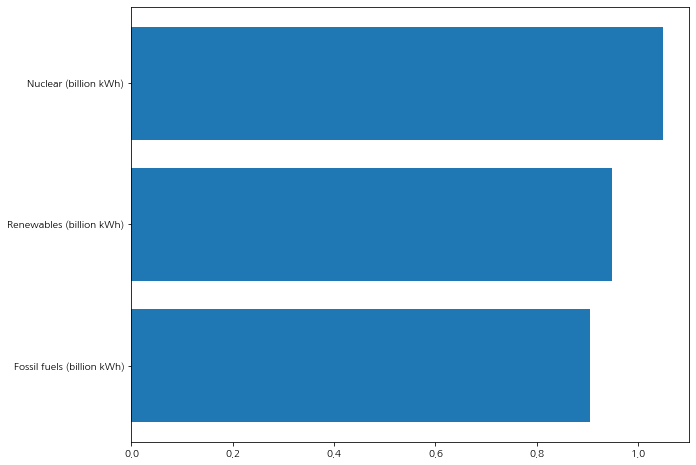

In [391]:
# Feature importance, feature 선언
importances = model.coef_
features = X.columns

# 중요한 변수 순으로 정렬
indices = np.argsort(importances)
sorted_features = [features[i] for i in indices]

# 그래프 크기 지정
plt.figure(figsize=(10, 8))

# 막대그래프 show
plt.barh(sorted_features, importances[indices])
plt.show()

In [392]:
China = df[df['COUNTRY'].values == 'China']

China.head()


,COUNTRY,Year,Biomass and waste (billion kWh),CO2 emissions (MMtonnes CO2),Coal (quad Btu),Coal and coke (MMtonnes CO2),Consumed natural gas (MMtonnes CO2),Consumption (quad Btu),Fossil fuels (billion kWh),GDP,...,Petroleum and other liquids (MMtonnes CO2),Petroleum and other liquids (quad Btu),Population,Renewables (billion kWh),Renewables and other (quad Btu),Solar (billion kWh),"Solar, tide, wave, fuel cell (billion kWh)",Tide and wave (billion kWh),Wind (billion kWh),electricity net consumption (billion kWh)
1680,China,1980,0.0,1596.696386,13.809654,1309.985254,30.839453,19.107288,227.856,684.6352,...,255.87168,4.124019,984203.1,57.618,0.592360,0.0,0.0,0.0,0.0,261.492
1681,China,1981,0.0,1587.190303,13.836130,1312.709603,27.480701,18.964347,229.172,719.5517,...,247.00000,3.937047,998881.7,64.845,0.673220,0.0,0.0,0.0,0.0,268.754
1682,China,1982,0.0,1671.101704,14.847019,1407.834711,23.266993,19.938801,238.102,784.3112,...,240.00000,3.894712,1013932.0,73.656,0.758539,0.0,0.0,0.0,0.0,285.858
1683,China,1983,0.0,1785.801619,15.924503,1510.481214,26.320404,21.285521,249.100,869.0171,...,249.00000,3.972963,1029457.0,85.536,0.891974,0.0,0.0,0.0,0.0,307.606
1684,China,1984,0.0,1948.070593,17.598646,1669.322712,26.747882,23.055197,272.788,1001.1070,...,252.00000,4.062523,1045569.0,85.932,0.889890,0.0,0.0,0.0,0.0,330.130


In [393]:
X = China[['Renewables (billion kWh)', 'Fossil fuels (billion kWh)', 'Nuclear (billion kWh)']]

X

,Renewables (billion kWh),Fossil fuels (billion kWh),Nuclear (billion kWh)
1680,57.618000,227.856000,0.000
1681,64.845000,229.172000,0.000
1682,73.656000,238.102000,0.000
1683,85.536000,249.100000,0.000
1684,85.932000,272.788000,0.000
1685,91.476000,299.202000,0.000
1686,93.555000,333.794000,0.000
1687,99.198000,373.274000,0.000
1688,108.009000,409.840000,0.000
1689,117.216000,438.322000,0.000


In [394]:
y = China['electricity net consumption (billion kWh)']

y

1680     261.492000
1681     268.754000
1682     285.858000
1683     307.606000
1684     330.130000
1685     351.318000
1686     385.299000
1687     425.192000
1688     466.479000
1689     498.708000
1690     549.342000
1691     597.204000
1692     666.142000
1693     738.807000
1694     818.535000
1695     876.577000
1696     920.966000
1697     983.495000
1698    1017.457000
1699    1076.767000
1700    1178.033000
1701    1314.783000
1702    1459.429000
1703    1676.829000
1704    1955.390000
1705    2196.172000
1706    2523.947000
1707    2891.542000
1708    3070.853000
1709    3290.103000
1710    3716.553620
1711    4182.663560
1712    4439.877580
1713    4846.246020
1714    5078.717560
1715    5273.535637
1716    5585.625151
1717    6057.175784
1718    6450.426757
1719    6802.698896
1720    7115.077185
1721    7805.656341
Name: electricity net consumption (billion kWh), dtype: float64

In [395]:
# 코드 10-2
# 스탯츠모델스, 사이킷런 ==========
from statsmodels.formula.api import ols 
from sklearn.linear_model import LinearRegression

# 선형 회귀모형 형태(종속변수 ~ 독립변수1 + 독립변수2 + 독립변수3 + ···)
# 단순 선형 회귀분석 ==========

# OLS 모델 적합
model = ols(formula='y ~ X', data={'y': y, 'X': X}).fit()

# 모델 요약 정보 출력
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 1.028e+06
Date:                Wed, 08 Nov 2023   Prob (F-statistic):           2.62e-93
Time:                        16:08:38   Log-Likelihood:                -146.51
No. Observations:                  42   AIC:                             301.0
Df Residuals:                      38   BIC:                             308.0
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -10.2187      2.296     -4.450      0.0

In [396]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 1004, shuffle = False)


In [397]:
from sklearn.svm import LinearSVR

from math import sqrt
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, accuracy_score
from  sklearn.metrics import r2_score

model = LinearSVR(epsilon=0.005, random_state=1) # random_state=1
model.fit(X_train, y_train)



C:\Users\vlrms\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.7_qbz5n2kfra8p0\LocalCache\local-packages\Python37\site-packages\sklearn\svm\_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


LinearSVR(epsilon=0.005, random_state=1)

In [398]:
# Predict를 수행하고 mean_absolute_error, rmse 결과 출력하기
pred = model.predict(X_test)    # X_test를 이용한 예측값 pred 
mean_absolute_error(y_test, pred)
np.sqrt(mean_squared_error(y_test, pred))

mae = mean_absolute_error(y_test, pred)
rmse = np.sqrt(mean_squared_error(y_test, pred))

# MAE 및 RMSE를 백분율로 표시
mae_percentage = (mae / np.mean(y_test)) * 100
rmse_percentage = (rmse / np.mean(y_test)) * 100

print("MAE: {:.2f}%".format(mae_percentage))
print("RMSE: {:.2f}%".format(rmse_percentage))
print('R^2: ', r2_score(y_test, pred))



MAE: 3.47%
RMSE: 4.35%
R^2:  0.9675855197847925


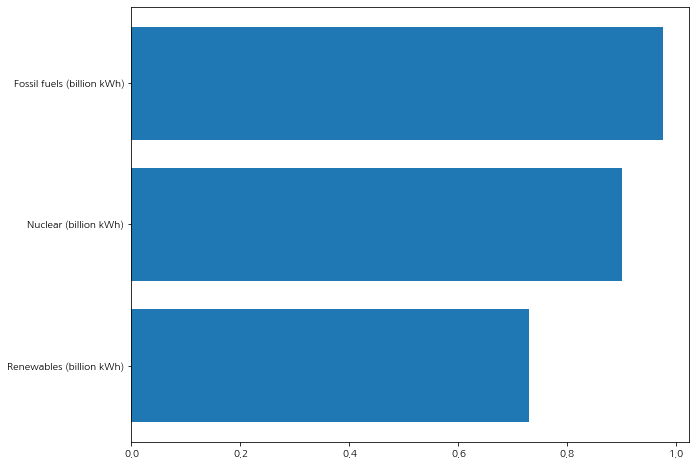

In [399]:
# Feature importance, feature 선언
importances = model.coef_
features = X.columns

# 중요한 변수 순으로 정렬
indices = np.argsort(importances)
sorted_features = [features[i] for i in indices]

# 그래프 크기 지정
plt.figure(figsize=(10, 8))

# 막대그래프 show
plt.barh(sorted_features, importances[indices])
plt.show()

In [400]:

United_Kingdom = df[df['COUNTRY'].values == 'United Kingdom']

United_Kingdom.head()


,COUNTRY,Year,Biomass and waste (billion kWh),CO2 emissions (MMtonnes CO2),Coal (quad Btu),Coal and coke (MMtonnes CO2),Consumed natural gas (MMtonnes CO2),Consumption (quad Btu),Fossil fuels (billion kWh),GDP,...,Petroleum and other liquids (MMtonnes CO2),Petroleum and other liquids (quad Btu),Population,Renewables (billion kWh),Renewables and other (quad Btu),Solar (billion kWh),"Solar, tide, wave, fuel cell (billion kWh)",Tide and wave (billion kWh),Wind (billion kWh),electricity net consumption (billion kWh)
9198,United Kingdom,1980,0.0,612.648924,3.154354,293.915852,94.275754,8.994696,228.927,1352.115,...,224.457317,3.643287,56329.63,3.921,0.003225,0.000,0.000,0.0,0.0,243.387
9199,United Kingdom,1981,0.0,563.333333,2.987708,277.253761,95.919025,8.556462,221.390,1339.465,...,190.160546,3.331088,56343.69,4.369,0.001243,0.000,0.000,0.0,0.0,238.669
9200,United Kingdom,1982,0.0,558.414153,2.802727,261.638088,95.437059,8.462944,210.765,1362.088,...,201.339006,3.342602,56299.88,4.543,0.018873,0.000,0.000,0.0,0.0,233.385
9201,United Kingdom,1983,0.0,551.067461,2.803645,264.401194,99.283083,8.487520,209.086,1414.738,...,187.383184,3.203005,56331.88,4.548,0.042625,0.000,0.000,0.0,0.0,235.909
9202,United Kingdom,1984,0.0,554.696208,1.948260,189.816480,101.841582,8.374870,210.998,1441.648,...,263.038146,3.835105,56430.38,3.993,0.093557,0.001,0.001,0.0,0.0,238.652


In [401]:
# 상위 - 하위 카테고리로 묶여 있는 값 제거. 상위 범주 안에 이미 해당 값들이 포함되어 있음 
X = United_Kingdom[['Renewables (billion kWh)', 'Fossil fuels (billion kWh)', 'Nuclear (billion kWh)']]

X

,Renewables (billion kWh),Fossil fuels (billion kWh),Nuclear (billion kWh)
9198,3.921000,228.927000,32.291000
9199,4.369000,221.390000,33.191000
9200,4.543000,210.765000,38.721000
9201,4.548000,209.086000,43.911000
9202,3.993000,210.998000,47.256000
9203,4.081000,217.373000,53.766000
9204,4.768000,223.287000,51.773000
9205,6.295000,229.696000,48.205000
9206,6.204000,227.236000,55.642000
9207,6.095000,225.547000,63.602000


In [402]:
y = United_Kingdom['electricity net consumption (billion kWh)']

y

9198    243.387000
9199    238.669000
9200    233.385000
9201    235.909000
9202    238.652000
9203    249.959000
9204    258.260000
9205    268.441000
9206    277.391000
9207    282.231000
9208    284.384000
9209    291.603000
9210    292.523000
9211    293.930000
9212    287.214000
9213    297.159000
9214    315.792000
9215    315.979000
9216    322.783000
9217    328.406000
9218    335.617620
9219    338.583700
9220    339.880310
9221    342.718950
9222    343.055980
9223    351.070490
9224    348.448230
9225    345.032800
9226    343.634290
9227    323.731820
9228    339.377520
9229    328.282185
9230    328.261434
9231    327.229419
9232    314.402287
9233    320.635534
9234    317.459384
9235    312.481032
9236    313.603551
9237    309.265107
9238    295.051395
9239    287.318898
Name: electricity net consumption (billion kWh), dtype: float64

In [403]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 1004, shuffle = False)


In [404]:
from sklearn.svm import LinearSVR

from math import sqrt
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, accuracy_score
from  sklearn.metrics import r2_score

model = LinearSVR(epsilon=0.005, random_state=1) # random_state=1
model.fit(X_train, y_train)



C:\Users\vlrms\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.7_qbz5n2kfra8p0\LocalCache\local-packages\Python37\site-packages\sklearn\svm\_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


LinearSVR(epsilon=0.005, random_state=1)

In [405]:
# Predict를 수행하고 mean_absolute_error, rmse 결과 출력하기
pred = model.predict(X_test)    # X_test를 이용한 예측값 pred 
mean_absolute_error(y_test, pred)
np.sqrt(mean_squared_error(y_test, pred))

mae = mean_absolute_error(y_test, pred)
rmse = np.sqrt(mean_squared_error(y_test, pred))

# MAE 및 RMSE를 백분율로 표시
mae_percentage = (mae / np.mean(y_test)) * 100
rmse_percentage = (rmse / np.mean(y_test)) * 100

print("MAE: {:.2f}%".format(mae_percentage))
print("RMSE: {:.2f}%".format(rmse_percentage))
print('R^2: ', r2_score(y_test, pred))



Train RMSE: 5.337413462334093
MAE: 0.97%
RMSE: 1.13%
R^2:  0.929440031571551


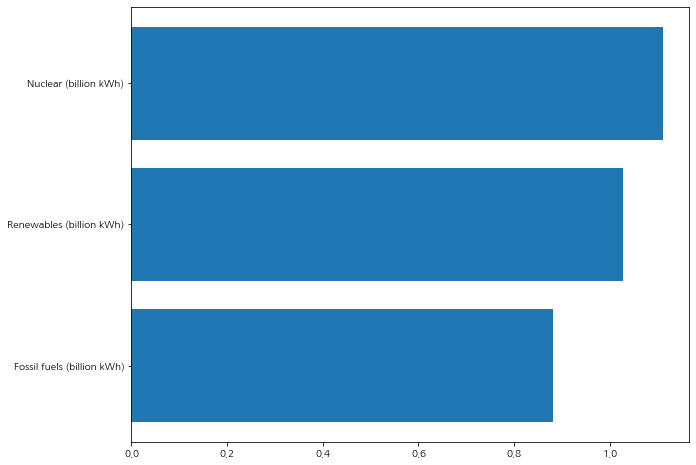

In [406]:
# Feature importance, feature 선언
importances = model.coef_
features = X.columns

# 중요한 변수 순으로 정렬
indices = np.argsort(importances)
sorted_features = [features[i] for i in indices]

# 그래프 크기 지정
plt.figure(figsize=(10, 8))

# 막대그래프 show
plt.barh(sorted_features, importances[indices])
plt.show()